In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sa
import folium
import pyspark
import pandas as pd
#import geopandas as gpd
import geopy
import geocoder
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster
%matplotlib inline
import sqlalchemy as sa
from sqlalchemy import create_engine
from pydqc.data_summary import distribution_summary_pretty
import geocoder
plt.style.use('seaborn-whitegrid')
path = 'C:\\Users\\ASUS\\Documents\\sales_forecasting_arima_-_fbprophet\\data\\'

In [2]:
store = pd.read_excel(path + 'Sample - Superstore.xls')

In [3]:
# Create SQL Alchemy Engine
engine = create_engine('postgres://postgres:Jakarta@83@127.0.0.1:5432/postgres')

In [4]:
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [31]:
# convert city name into geospatial long lat

geolocator = Nominatim()
store['city_coord'] = store['City'].apply(geolocator.geocode)

GeocoderTimedOut: Service timed out

In [5]:
store.shape

(9994, 21)

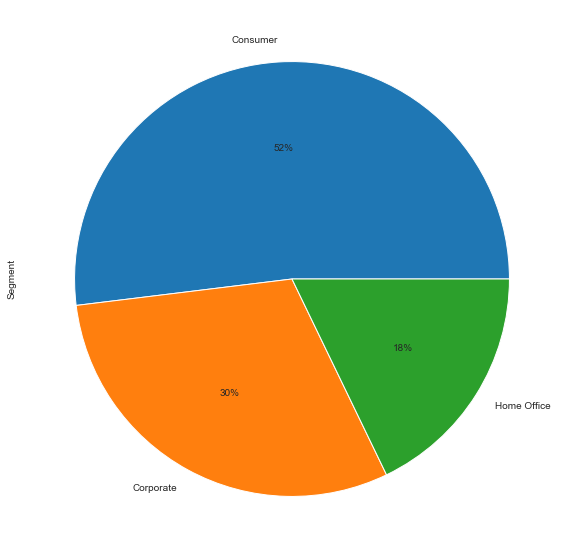

In [7]:
store.groupby('Segment')['Segment'].count().plot(kind='pie', figsize=(30,10), autopct='%1.0f%%')

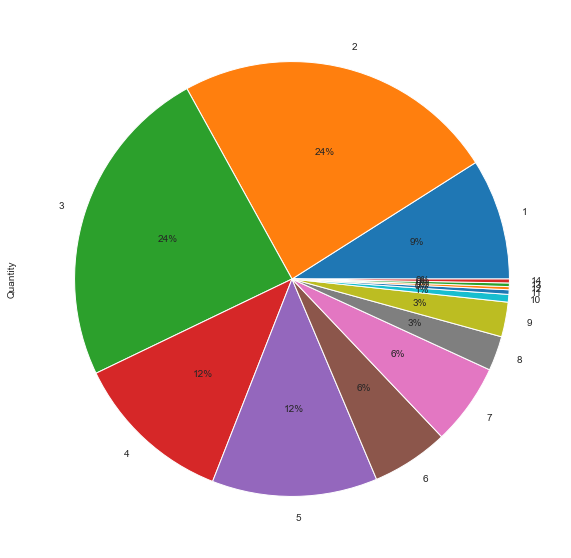

In [9]:
store.groupby('Quantity')['Quantity'].count().plot(kind='pie', figsize=(30,10), autopct='%1.0f%%')

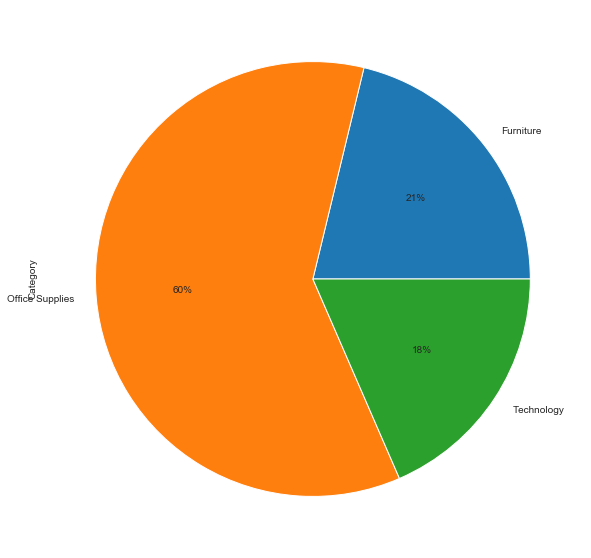

In [10]:
store.groupby('Category')['Category'].count().plot(kind='pie', figsize=(30,10), autopct='%1.0f%%')

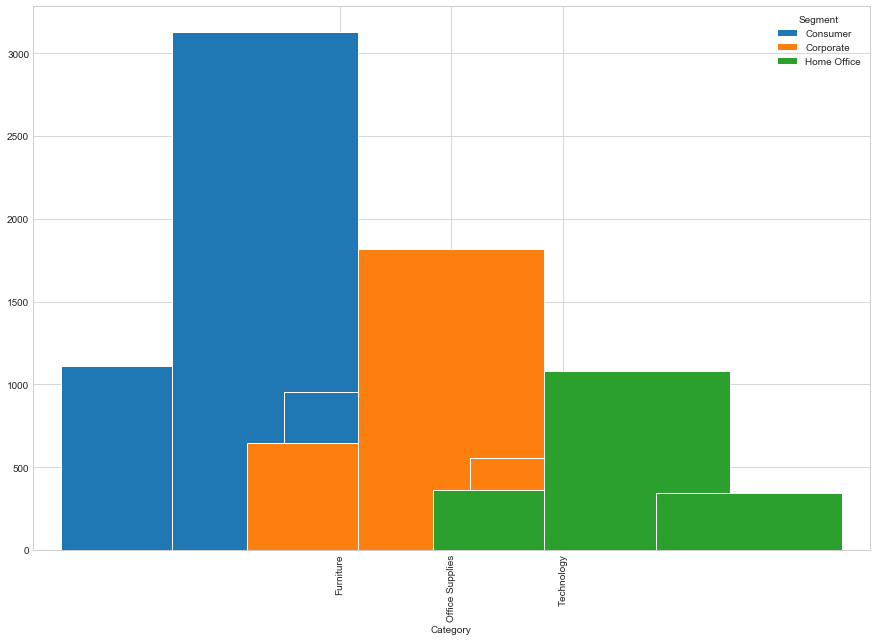

In [13]:
pd.crosstab(store['Category'],store['Segment']).plot.bar(figsize=(15,10), width=5 )

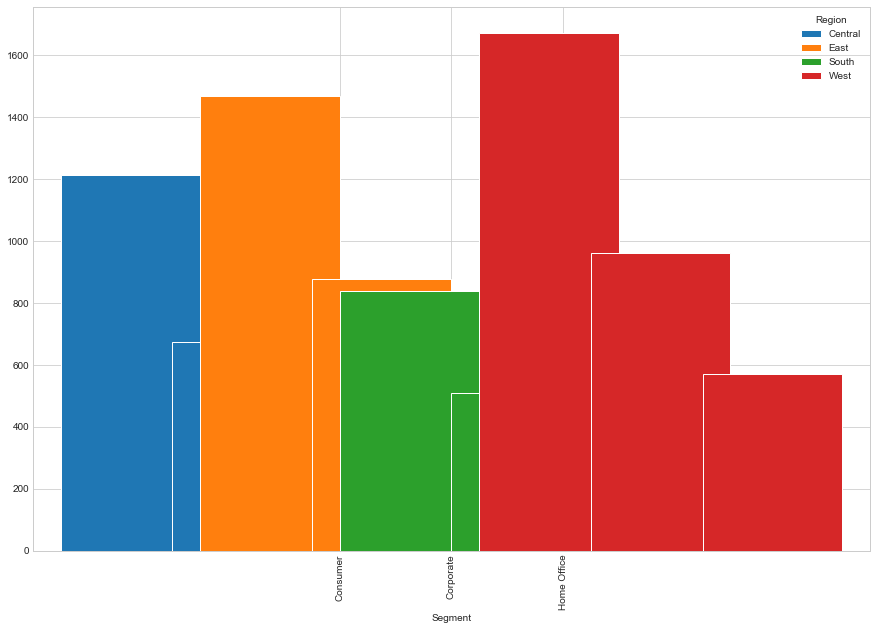

In [15]:
pd.crosstab(store['Segment'],store['Region']).plot.bar(figsize=(15,10), width=5 )

In [6]:
store.to_sql(name='retail_store', con=engine, if_exists='replace')